In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [106]:
# Ensure pandas is imported
import pandas as pd

df_co2 = pd.read_csv(r"C:\Users\Infinix X2\Documents\SEMESTER 8\Data Science\DATASET\co2.csv")
df_co2


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [107]:
df_co2.info()
df_co2.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [108]:
# Drop duplicate rows across all columns
df_co2 = df_co2.drop_duplicates()

# Drop rows with missing data across all columns
df_co2 = df_co2.dropna()

df_co2



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [109]:
df_co2.info()
df_co2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


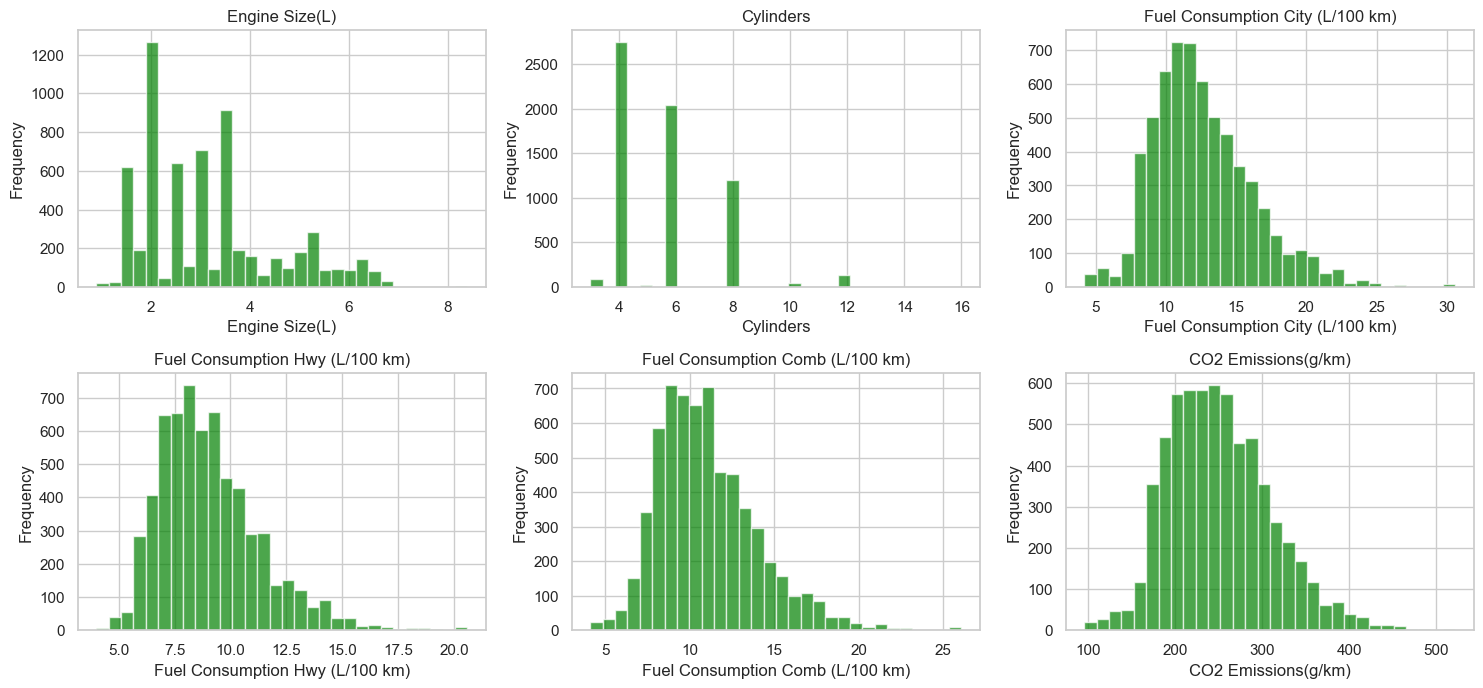

In [110]:
# Membuat histogram untuk kolom numerik yang relevan
numerical_columns = [
    'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
    'CO2 Emissions(g/km)'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    df_co2[col].hist(bins=30, alpha=0.7, color='green')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

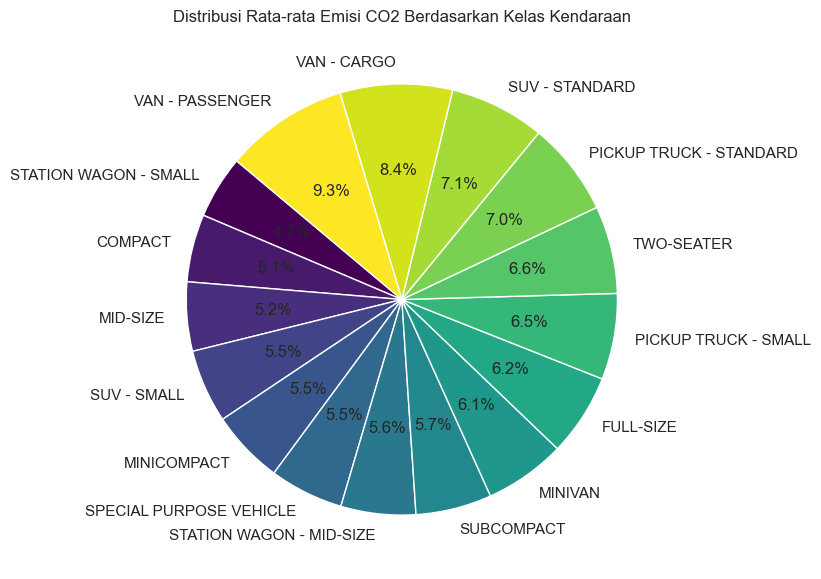

In [111]:
# Pie chart distribusi rata-rata emisi CO2 berdasarkan kelas kendaraan
plt.figure(figsize=(10,7))
avg_co2_per_class.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title("Distribusi Rata-rata Emisi CO2 Berdasarkan Kelas Kendaraan")
plt.ylabel("")  # Menghapus label default pada sumbu y
plt.show()

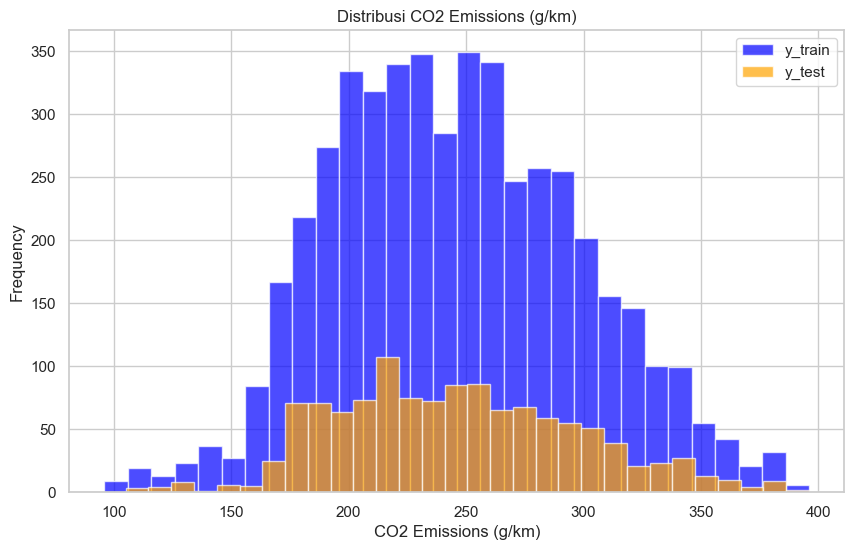

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, color='blue', alpha=0.7, label='y_train')
plt.hist(y_test, bins=30, color='orange', alpha=0.7, label='y_test')
plt.title('Distribusi CO2 Emissions (g/km)')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

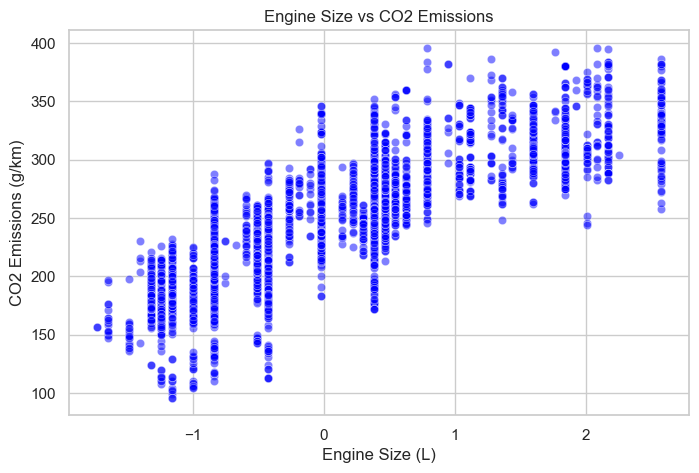

In [113]:
# Scatter Plot: Engine Size vs CO2 Emissions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train['Engine Size(L)'], y=y_train, alpha=0.5, color="blue")
plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()



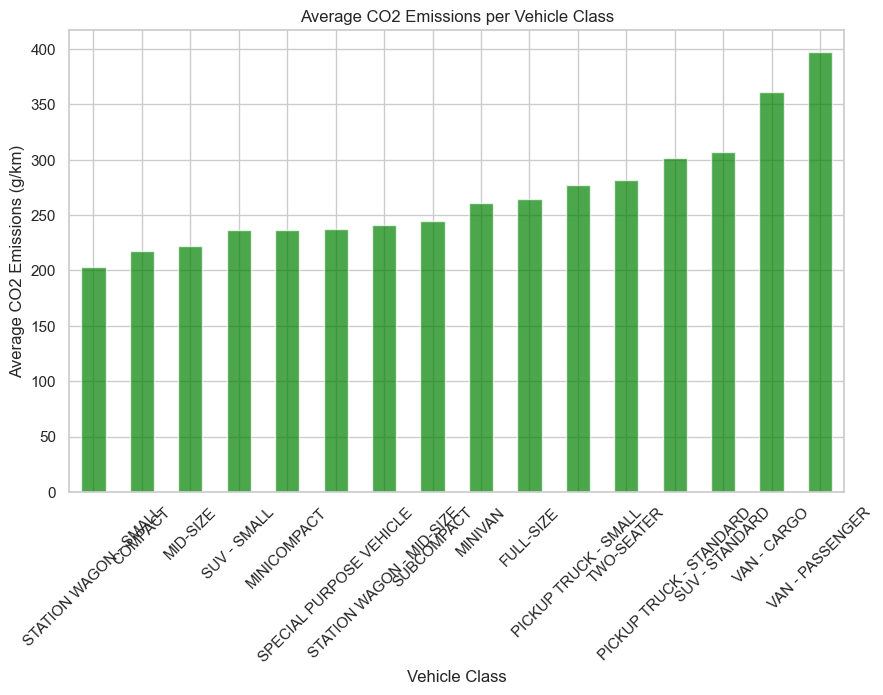

In [114]:
# Bar Chart: Average CO2 Emissions per Vehicle Class
plt.figure(figsize=(10, 6))
avg_co2_per_class.plot(kind='bar', color='green', alpha=0.7)
plt.title("Average CO2 Emissions per Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Average CO2 Emissions (g/km)")
plt.xticks(rotation=45)
plt.show()



C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_9064\1174364942.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df_fuel_type, palette="Set3")


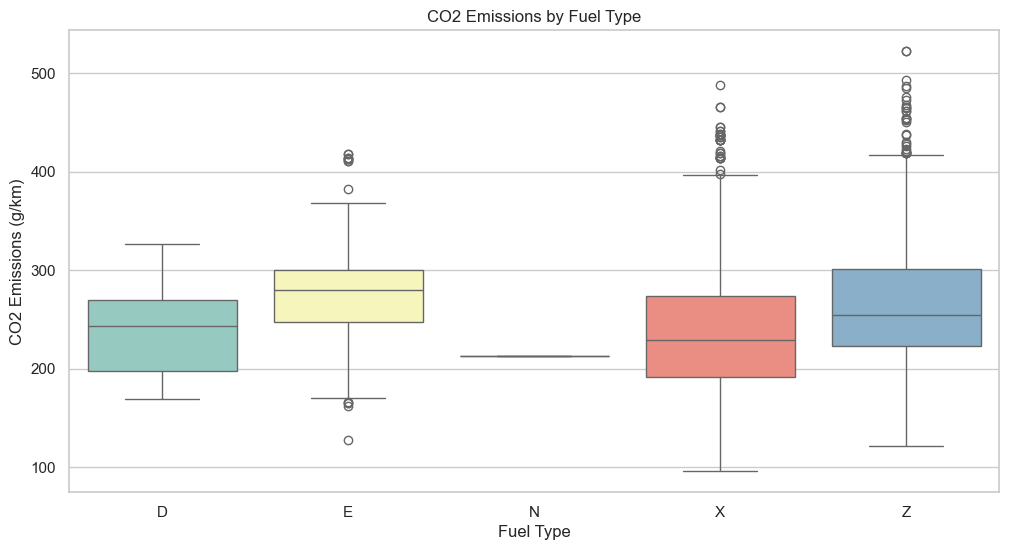

In [115]:
# Ensure one-hot encoding for 'Fuel Type' column
if not {'Fuel Type_D', 'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'}.issubset(df_co2.columns):
	df_co2 = pd.get_dummies(df_co2, columns=['Fuel Type'])

# Box Plot: CO2 Emissions by Fuel Type
plt.figure(figsize=(12, 6))

# Create a mapping for the one-hot encoded columns to their original categories
fuel_type_mapping = {
	'Fuel Type_D': 'D',
	'Fuel Type_E': 'E',
	'Fuel Type_N': 'N',
	'Fuel Type_X': 'X',
	'Fuel Type_Z': 'Z'
}

# Melt the DataFrame to create a categorical column for Fuel Type
df_fuel_type = df_co2[['CO2 Emissions(g/km)'] + list(fuel_type_mapping.keys())].copy()
df_fuel_type = df_fuel_type.melt(id_vars=['CO2 Emissions(g/km)'], var_name='Fuel Type', value_name='Value')
df_fuel_type = df_fuel_type[df_fuel_type['Value'] == 1].drop(columns=['Value'])
df_fuel_type['Fuel Type'] = df_fuel_type['Fuel Type'].map(fuel_type_mapping)

sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df_fuel_type, palette="Set3")
plt.title("CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

In [116]:
# Deteksi dan hapus outlier pada fitur numerik
numerical_features = ['Engine Size(L)', 'Cylinders', 'CO2 Emissions(g/km)']
for col in numerical_features:
    Q1 = df_co2[col].quantile(0.25)
    Q3 = df_co2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_co2 = df_co2[(df_co2[col] >= lower) & (df_co2[col] <= upper)]

In [117]:
df_co2 = df_co2.drop(['Fuel Consumption Comb (mpg)', 'Model'], axis=1)

In [121]:
# Ensure the columns exist before applying get_dummies
columns_to_encode = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']
existing_columns = [col for col in columns_to_encode if col in df_co2.columns]

if existing_columns:
	df_co2 = pd.get_dummies(df_co2, columns=existing_columns)
else:
	print("No columns to encode.")

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']
df_co2[numerical_cols] = scaler.fit_transform(df_co2[numerical_cols])

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_co2.drop('CO2 Emissions(g/km)', axis=1)
y = df_co2['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE setelah transformasi: {rmse:.2f}')

RMSE setelah transformasi: 7404975214.47
